# HW4 - Data Cleaning and Regex
## DUE: 27th September 2024 - 23:59

- There are 20 questions in this homework. 5 poitns total.
- Data for this homework can be found [HW4.zip](https://github.com/yongsa-nut/TU_CN240_DataScience_671/blob/main/Data/HW4.zip)

## Regex Practices

- Run the code below so you can check your answers.

In [296]:
import re

# function to check your regex
def test_regex(pattern, test_cases, expected_results, match_type='full'):
    print(f"Testing pattern: {pattern}")

    for i, (test, expected) in enumerate(zip(test_cases, expected_results), 1):
        if match_type == 'full':
            result = bool(re.fullmatch(pattern, test))
            match_text = 'matches' if result else 'does not match'
        elif match_type == 'search':
            result = bool(re.search(pattern, test))
            match_text = 'contains match' if result else 'does not contain match'

        print(f"Test {i}: {'✓' if result == expected else '✗'} - '{test}' {match_text}")

        if match_type == 'search' and result:
            matches = re.findall(pattern, test)
            print(f"   Matches found: {matches}")

    print()

## Q1a - Uppercase and lowercase only

Write a regular expression to match a string that contains only uppercase and lowercase letters (no numbers or special characters).

- Match: HelloWorld, abcDEF, RegexPractice
- Not match: Hello123, Special@Characters, With Spaces

In [297]:
pattern_1a = r"[A-Za-z]*"  # Fill in your regex here

## Test cases
test_cases_1a = ["HelloWorld", "abcDEF", "RegexPractice", "Hello123", "Special@Characters", "With Spaces"]
expected_1a = [True, True, True, False, False, False]
test_regex(pattern_1a, test_cases_1a, expected_1a)

Testing pattern: [A-Za-z]*
Test 1: ✓ - 'HelloWorld' matches
Test 2: ✓ - 'abcDEF' matches
Test 3: ✓ - 'RegexPractice' matches
Test 4: ✓ - 'Hello123' does not match
Test 5: ✓ - 'Special@Characters' does not match
Test 6: ✓ - 'With Spaces' does not match



### Q1b - Zip codes
Create a regex pattern to match a zip code in the format xxxxx or xxxxx-xxxx, where x represents a digit.

- Match: 12345, 12345-6789
- Not match: 1234, 123, 123456, 12345-678

In [298]:
pattern_1b = r"^\d{5}(-\d{4})?$"  # Fill in your regex here

## Test cases
test_cases_1b = ["12345", "12345-6789", "1234", "123", "123456", "12345-678"]
expected_1b = [True, True, False, False, False, False]
test_regex(pattern_1b, test_cases_1b, expected_1b)

Testing pattern: ^\d{5}(-\d{4})?$
Test 1: ✓ - '12345' matches
Test 2: ✓ - '12345-6789' matches
Test 3: ✓ - '1234' does not match
Test 4: ✓ - '123' does not match
Test 5: ✓ - '123456' does not match
Test 6: ✓ - '12345-678' does not match



### Q1c - Time

Develop a regex pattern to match a time in 24-hour format (HH:MM), where HH is between 00 and 23, and MM is between 00 and 59.

- Match: 13:45, 00:00, 23:59
- Not match: 24:00, 12:60, 1:30

In [299]:
pattern_1c = r"^([0-1]\d|2[0-3]):([0-5]\d)$"  # Fill in your regex here

## Test cases
test_cases_1c = ["13:45", "00:00", "23:59", "24:00", "12:60", "1:30"]
expected_1c = [True, True, True, False, False, False]
test_regex(pattern_1c, test_cases_1c, expected_1c)

Testing pattern: ^([0-1]\d|2[0-3]):([0-5]\d)$
Test 1: ✓ - '13:45' matches
Test 2: ✓ - '00:00' matches
Test 3: ✓ - '23:59' matches
Test 4: ✓ - '24:00' does not match
Test 5: ✓ - '12:60' does not match
Test 6: ✓ - '1:30' does not match



### Q1d - username

Write a regular expression to match a string that contains only lowercase letters and underscores, starts with a letter, and is between 3 and 16 characters long.

- Match: hello_world, a_b_c
- Not match: username_123, _hello, ab, abcdefghijklmnopq

In [300]:
pattern_1d = r"^[a-z][a-z_]{2,15}$"  # Fill in your regex here

## Test cases
test_cases_1d = ["hello_world", "a_b_c", "username_123", "_hello", "ab", "abcdefghijklmnopq"]
expected_1d = [True, True, False, False, False, False]
test_regex(pattern_1d, test_cases_1d, expected_1d)

Testing pattern: ^[a-z][a-z_]{2,15}$
Test 1: ✓ - 'hello_world' matches
Test 2: ✓ - 'a_b_c' matches
Test 3: ✓ - 'username_123' does not match
Test 4: ✓ - '_hello' does not match
Test 5: ✓ - 'ab' does not match
Test 6: ✓ - 'abcdefghijklmnopq' does not match



### Q1e - Apple or Orange

Create a regex pattern to find the word "apple" or "orange" in a sentence.

- Match: "I prefer apple juice over orange juice." (Match: apple, orange), "The orange cat played with an apple." (Match: orange, apple)

- Not Match: "Pineapple is my favorite fruit.", "He wore an oran shirt."

In [301]:
pattern_1e = r"\b(apple|orange)\b"  # Fill in your regex here

## Test cases
test_cases_1e = [
            "I prefer apple juice over orange juice.",
            "The orange cat played with an apple.",
            "Pineapple is my favorite fruit.",
            "He wore an oran shirt."
               ]
expected_1e = [True, True, False, False]
test_regex(pattern_1e, test_cases_1e, expected_1e,'search')

Testing pattern: \b(apple|orange)\b
Test 1: ✓ - 'I prefer apple juice over orange juice.' contains match
   Matches found: ['apple', 'orange']
Test 2: ✓ - 'The orange cat played with an apple.' contains match
   Matches found: ['orange', 'apple']
Test 3: ✓ - 'Pineapple is my favorite fruit.' does not contain match
Test 4: ✓ - 'He wore an oran shirt.' does not contain match



## Bloomberg News Analysis

- For the rest of this homework, we will analyse Bloomberg articles published during 2010
- The data that we will use for this section is `msft_bloomberg_news.txt`.
- The data is in json format so we will have to use `.read_json()`

In [302]:
import pandas as pd
from plotnine import *

# Ensure that pandas shows at least 280 characters in columns, so we can see full articles.
pd.set_option("max_colwidth", 280)

msft_news_df = pd.read_json('/content/msft_bloomberg_news.txt').set_index('id')
msft_news_df.head(3)

,title,released_at,content,path
id,,,,
46243185,Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover,<date>May 29 2012</date> <time>09:40:58</time>,"Opera Software ASA (OPERA) , the Norwegian\nmarker of Internet browsers, surged the most on record in Oslo\nafter technology website Pocket-Lint reported that Facebook Inc. (FB) \nmay try to acquire the company. Opera gained as much as 26 percent, the biggest jump since\n...",./2008_2012_msft_bloomberg_news/opera-jumps-most-on-record-after-report-of-facebook-s-interes.txt
73522879,Microsoft Calls Intel’s Comments on Next Windows ‘Inaccurate’,<date>May 18 2011</date> <time>22:42:40</time>,"Microsoft Corp. (MSFT) said comments made by\nan Intel Corp. (INTC) executive yesterday about future version of its\nWindows operating system were “factually inaccurate and\nunfortunately misleading.” Renee James, head of Intel’s software business, said\nyesterday that Mi...",./2008_2012_msft_bloomberg_news/icrosoft-calls-intel-s-comments-on-next-windows-inaccurate-.txt
29296500,Lawyers Raking in Cash as Campaign Spending Hits Records,<date>August 15 2012</date> <time>00:09:02</time>,"Every four years, a new mix of politicians assembles to compete for the opportunity to run for president. While the candidates’ names and faces change, the lawyers stay the same. Attorney Michael Toner began his presidential-campaign legal career in 1996 working for Republic...",./2008_2012_msft_bloomberg_news/awyers-raking-in-cash-as-campaign-spending-hits-records.txt


In [303]:
msft_news_df.shape

(4635, 4)

**CAUTION: Viewing the contents of large files in a Jupyter Notebook could crash your browser. Be careful not to print the entire contents of the file.**


<br>

---

## Question 2: Time Analysis

After loading in the data, we can start exploring news articles by analyzing the relationships between the release dates (date of publication) and different topics and companies.

---

### Question 2a-b

First, let's extract the date and time from the `released_at` column in `msft_news_df`. Notice that the date and time are encoded in the following format:

```
<date>May 29 2012</date> <time>09:40:58</time>
<date>May 18 2011</date> <time>22:42:40</time>
<date>August 15 2012</date> <time>00:09:02</time>
...
```

There are several ways to convert this to easy to use formats. However, for this assignment, we are going to use string manipulation functions.

- Create a regular expression that extracts the Month, Day, Year, Hour, Minute, and Second from the `msft_news_df["released_at"]` column. You should create a new `DataFrame` called `dates` that contains:
  1. The same index as `msft_news_df` (`id`) and
  2. Column labels: `"Month"`, `"Day"`, `"Year"`, `"Hour"`, `"Minute"`, `"Second"`.

- Additionally, **convert all numerical values** (`"Year"`, `"Day"`, `"Hour"`, `"Minute"`, `"Second"`) to type `int`.
  - We haven't learned how to do this compactly so you will have to do it one by one.
  - To convert, you can use '.astype()` see [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)

**Hint 1:** You should use the [`Series.str.extract`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html) function.

**Hint 2:** Don't forget to use raw strings and capture groups. Copy the above example text into [regex101.com](https://regex101.com/) to experiment with your regular expressions.

**Hint 3:** It might be helpful to break this up into a couple of steps (e.g., first extract date values such as Month, Day, and Year and then extract time values such as Hour, Minute, and Second).

In [304]:
pattern = r'([A-Za-z]+) (\d{1,2}) (\d{4}).*(\d{2}):(\d{2}):(\d{2})'

dates = msft_news_df['released_at'].str.extract(pattern)
dates.columns = ['Month', 'Day', 'Year', 'Hour', 'Minute', 'Second']
dates = dates.astype({'Year': int, 'Day': int, 'Hour': int, 'Minute': int, 'Second': int})

dates.head()

,Month,Day,Year,Hour,Minute,Second
id,,,,,,
46243185,May,29,2012,9,40,58
73522879,May,18,2011,22,42,40
29296500,August,15,2012,0,9,2
49799724,July,1,2011,22,12,37
20739032,January,18,2012,1,20,28


<br>

---

### Question 2c

Now that we've figured out how to extract dates, create a new `DataFrame` called `msft_news_2010` that only contains articles released in 2010. This `DataFrame` should contain:
1. An index of `id` and
2. Columns: `"title"`, `"released_at"`, `"content"`, `"path"`, `"Month"`, `"Day"`, and `"Year"`.

**Hint:** Consider [merging](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) `msft_news_df` with `dates`.

In [305]:
# merging
msft_news_df = pd.merge(msft_news_df, dates, how='inner', on='id')

# grab only 2010
msft_news_2010 = msft_news_df[msft_news_df['Year'] == 2010]

msft_news_2010.head(1)

,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second
id,,,,,,,,,,
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"Netflix Inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n Net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the Los Gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,23,52,36


<br>

---

### Question 2d-e

After processing the article release dates, we can analyze articles about different topics and companies. Note that all the articles in the provided dataset mention Microsoft/MSFT, but they can also mention other companies.


For each company in the list of `companies` (provided below), add a boolean column to the `msft_news_df` `DataFrame` indicating whether the corresponding company is mentioned in the text of the article. Ultimately, you should add six new columns (`"amazon"`, `"nintendo"`, `"apple"`, `"sony"`, `"facebook"`, `"netflix"` ) containing `True`/`False` values to the `DataFrame`. You may use a for loop over the list of companies.

The table should look similar to the row pictured below:

<img src = "https://drive.google.com/thumbnail?id=1_66nvLPNyOkupLuLuAfy8n3QJ6kI5ntl&sz=w1000" width = "1000">

**Note:** Make the contents of the articles **lowercase** before searching for the keywords.

In [306]:
companies = ["amazon", "nintendo", "apple", "sony", "facebook", "netflix"]

msft_news_df['content'] = msft_news_df['content'].str.lower()

for company in companies:
    msft_news_df[company] = msft_news_df['content'].str.contains(company)

msft_news_df.head(1)

,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second,amazon,nintendo,apple,sony,facebook,netflix
id,,,,,,,,,,,,,,,,
46243185,Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover,<date>May 29 2012</date> <time>09:40:58</time>,"opera software asa (opera) , the norwegian\nmarker of internet browsers, surged the most on record in oslo\nafter technology website pocket-lint reported that facebook inc. (fb) \nmay try to acquire the company. opera gained as much as 26 percent, the biggest jump since\n...",./2008_2012_msft_bloomberg_news/opera-jumps-most-on-record-after-report-of-facebook-s-interes.txt,May,29,2012,9,40,58,False,False,True,False,True,False


### Question 3a

Now, we can put everything together to analyze the release dates and volume of articles for different companies.

- Ceate a new `DataFrame` called `year_news` that contains the **number of articles** mentioning each company in the list `companies` **after 2010 (inclusive)**.
- `year_news` should have six columns (one column for each company), and the index of this `DataFrame` should be the release year `"Year"`.

The data should look like below:

<img src = "https://drive.google.com/thumbnail?id=1VsFWxv54YRKf5Jd4f33kAmkovgCAznIy&sz=w1000" width = "500">

In [307]:
# grab after 2010
year_news = msft_news_df[msft_news_df['Year'] >= 2010]

# group by year and count the number of articles
year_news = year_news.groupby('Year')[companies].sum()

year_news.head()

,amazon,nintendo,apple,sony,facebook,netflix
Year,,,,,,
2010,41,28,190,55,74,9
2011,101,29,477,104,158,43
2012,179,44,766,97,271,40
2013,152,93,687,196,238,51


### Question 3b
- `year_news` is still not in the format that we can plot. In other word, the data is not tidy.
- Think about when you need to plot this graph, you want to set x to `year`, y = `count`, and group/color = `company`
- What we want is the data with the following columns: `company`, `year`, and `count`.
- `melt` this data to be the right format.

In [308]:
year_news = year_news.reset_index()
year_news = year_news.melt(id_vars='Year', var_name='company', value_name='count')
year_news

,Year,company,count
0,2010,amazon,41
1,2011,amazon,101
2,2012,amazon,179
3,2013,amazon,152
4,2010,nintendo,28
5,2011,nintendo,29
6,2012,nintendo,44
7,2013,nintendo,93
8,2010,apple,190
9,2011,apple,477


### Question 3c

- Now we can use `year_news` to plot the number of articles of the six companies from 2010 to 2013.
- Create a plot as show below. Don't forget y label and title.
- If your lines don't match the plot below. Check 3a-3b.

In [309]:
# See the graph below

<ipython-input-310-eefdc228dea6>:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


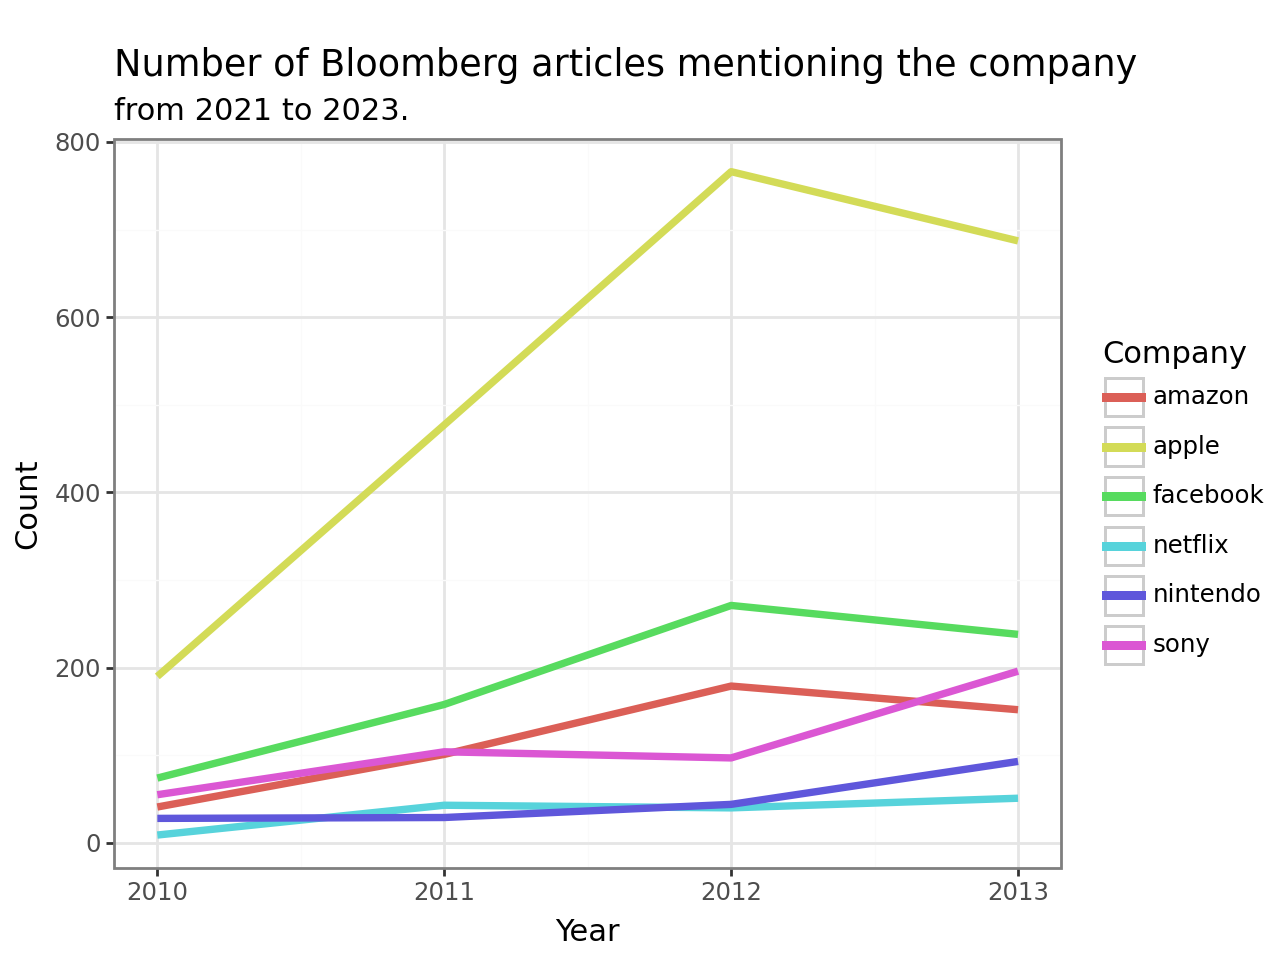

In [310]:
g_year_news =  (
                  ggplot(year_news,
                         aes(x='Year', y='count', color='company'))
                  + geom_line(size = 1.5)
                  + labs(
                        title='\nNumber of Bloomberg articles mentioning the company',
                        subtitle='from 2021 to 2023.',
                        y = 'Count',
                        color= 'Company')
                  + theme_bw()
)
print(g_year_news)

<br>

---

## Sentiment Analysis

In this section, we will analyse the sentiment of each article - classifying whether the tone of the article is positive or negative.

This part is divided into two sub-parts:
1. Using AFINN library to analyse the first sentence of the article only.
2. Compare to existing sentiment analysis that was done using a more recent technique based on transformer, called [DistrilBert](https://github.com/huggingface/transformers/tree/main/examples/research_projects/distillation).

The reason for this is that the recent model is quite big and we cannot easily run it. On the other hand, AFINN is much smaller and fast.
Due to the size of the dataset, we will focus only the articles in 2010, `msft_news_2010`.

### Question 4a: MSFT only

- We will focus on articles about Microsoft only.
- For this question, assign `microsoft_re` to a regular expression that **matches all sentences referencing "microsoft" or "msft" (in lowercase)**. You should assume all sentences end with `.`, `?`, or `!` and that these punctuation characters are not used for any other purpose.
- This is of course not true in practice (e.g., this example! and 3.14), but we will often make these simplifying assumptions to enable progress in data analysis. You will see this in your results.
- You should develop and test your regular expression using [regex101.com](https://regex101.com/). Here are some practice sentences.

```
have you ever worked at microsoft? i once did. microsoft is known for
their research in ai. it is abbreviated as msft.
```

**Hint 1:** Consider using the negation character class `r"[^.!?]"` to indicate any characters except these three.

**Hint 2:** `( )` will specifies a capture group. You have two options: 1) don't use it, 2) add `:?` so `(:?xxxx|xxx)`. Both ways are accepted.

**Hint 3:** Your regex should consist of `[Anything before](:?xxxxx|xxx)[Anything after][Ending symbols]`


In [311]:
microsoft_re = r'[^.!?]*(?:microsoft|msft)[^.!?]*[.!?]'


### Question 4b: Sentiment of the first sentece

- The article can be quite long and running all of them through the model will take time. Instead, we will only analyze the **first sentence** that mentions `microsoft` or `msft` from each article in `msft_news_2010`.

Specifically, you should:

1. Canonicalize the content of the articles (`content` column) by converting the text to **lowercase**,
2. Use the `microsoft_re` regular expression to extract the first sentence mentioning "microsoft" or "msft" in each article **without**, and
3. Create a new column `first_sentence` in `msft_news_2010` with these values.


**Hint 1:** The `Series.str.findall` function might be useful (might take around a minute to run).

**Hint 2:** We only want the first sentence from each article that matches `microsoft_re`. Take a look at the [documentation for `Series.str.findall`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html) to see how this function handles multiple matches to `microsoft_re`.

**Hint 3:** To get the first match you can do `.str[0]`

In [312]:
# content to lower
msft_news_2010["content"] = msft_news_2010["content"].str.lower()

# find all msft
msft_news_2010["first_sentence"] = msft_news_2010["content"].str.findall(microsoft_re).str[0]

msft_news_2010.head(5)

<ipython-input-312-91ee1f29a863>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-312-91ee1f29a863>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second,first_sentence
id,,,,,,,,,,,
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"netflix inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the los gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,23,52,36,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said."
75227517,"Republican Win May Be Tax Boon for Companies, High Incomes",<date>November 3 2010</date> <time>16:46:00</time>,"americans with the highest incomes\nand u.s. corporations, especially those with international\noperations, stand to be big winners as newly elected\ncongressional republicans signal they will extend existing tax\nbenefits and push for new ones. republicans will use their ne...",./2008_2012_msft_bloomberg_news/republican-sweep-may-mean-tax-boon-for-u-s-multinationals-high-incomes.txt,November,3,2010,16,46,0,", microsoft corp."
57850804,Alibaba Says It Now Offers Sohu’s Search Engine,<date>October 29 2010</date> <time>12:23:43</time>,"alibaba group holding ltd. said\nusers of its search-engine service may now access technology\nsupplied by sohu.com inc. , as the two chinese companies \nstrengthen collaboration to challenge industry leader baidu inc. users of alibaba’s etao.com search service may now o...",./2008_2012_msft_bloomberg_news/alibaba-says-it-now-offers-sohu-s-search-engine.txt,October,29,2010,12,23,43,"com search service may now opt for\nthe sogou software, in addition to microsoft corp."
75532360,Slim Solution for Trade Imbalances Is More Buying by China,<date>October 31 2010</date> <time>16:05:40</time>,"billionaire carlos slim , the world’s\nrichest man, said china must buy more and the u.s. needs to step\nup private investment to reduce the trade imbalance and boost\ntheir economies. global currency devaluation efforts will fail in the\nabsence of economic policies that f...",./2008_2012_msft_bloomberg_news/slim-solution-for-trade-imbalances-is-more-buying-by-china-u-s-investing.txt,October,31,2010,16,5,40,"” gates, the co-founder of microsoft corp."
10176588,"S&P 500 to Defy `New Normal' and Rally 17%, Cambiar's Barish Says",<date>December 1 2010</date> <time>20:38:58</time>,"energy and industrial companies will\nrise next year, propelling a 17 percent gain in the standard &\npoor’s 500 index from its current level, according to cambiar\ninvestors llc’s brian barish . next year will be marked by a “multi-speed recovery” as\nindustries weakened b...",./2008_2012_msft_bloomberg_news/s-p-500-to-defy-pimco-s-new-normal-rise-17-by-end-of-2011-barish-says.txt,December,1,2010,20,38,58,"intel, microsoft corp."


### Question 4c: Sentiment Analysis with AFINN Library

- We will be using the [AFINN Library](https://github.com/fnielsen/afinn) to do sentiment analysis.
- This library provides a word-based sentiment analysis that calculate the sentiment score based on a labeled word list, where each word has been scored for valence - a scale between negative (-5) and positive (5).
- `.score()` return the total score by summing the scores of every word together.
- You can test the code below.

In [313]:
!pip install afinn

In [314]:
from afinn import Afinn

afn = Afinn()

In [315]:
sentence = "Happy hungry rice cat god dog ? cute? dead food " # Try removing or adding words here

print(f"Raw score = {afn.score(sentence)}")
print(f"Avg normalized score = {afn.score(sentence)/len(sentence.split())/5:.2f}")

Raw score = 3.0
Avg normalized score = 0.06


- Using this model, let's now get the **numerical** sentiment score of the first sentence that mentions "microsoft" or "msft" for each article.
- We will add a new column `sentence_total_sentiment` to `msft_news_2010` by calling `afn.score` on `first_sentence` using `apply` (We will cover this in the next lecture.)

In [316]:
# TypeError                                 Traceback (most recent call last)
# <ipython-input-152-a62a19864955> in <cell line: 1>()
# ----> 1 msft_news_2010.loc[:,'sentence_total_sentiment'] = msft_news_2010['first_sentence'].apply(afn.score)
#       2 msft_news_2010.head(5)

# 8 frames
# lib.pyx in pandas._libs.lib.map_infer()

# /usr/lib/python3.10/re.py in sub(pattern, repl, string, count, flags)
#     207     a callable, it's passed the Match object and must return
#     208     a replacement string to be used."""
# --> 209     return _compile(pattern, flags).sub(repl, string, count)
#     210
#     211 def subn(pattern, repl, string, count=0, flags=0):

# TypeError: expected string or bytes-like object

# ----->> ผมมีปัญาหาตรงกรณีที่ ไม่มีmsft ก็คือ เกิด ว่างเปล่า เลยต้อง edit แปลงทั้งหดมเป็น str<<---------------
# msft_news_2010['first_sentence'] = msft_news_2010['first_sentence'].astype(str)

msft_news_2010.loc[:,'sentence_total_sentiment'] = msft_news_2010['first_sentence'].apply(afn.score)
msft_news_2010.head(5)

<ipython-input-316-c2c00403af03>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second,first_sentence,sentence_total_sentiment
id,,,,,,,,,,,,
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"netflix inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the los gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,23,52,36,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said.",-3.0
75227517,"Republican Win May Be Tax Boon for Companies, High Incomes",<date>November 3 2010</date> <time>16:46:00</time>,"americans with the highest incomes\nand u.s. corporations, especially those with international\noperations, stand to be big winners as newly elected\ncongressional republicans signal they will extend existing tax\nbenefits and push for new ones. republicans will use their ne...",./2008_2012_msft_bloomberg_news/republican-sweep-may-mean-tax-boon-for-u-s-multinationals-high-incomes.txt,November,3,2010,16,46,0,", microsoft corp.",0.0
57850804,Alibaba Says It Now Offers Sohu’s Search Engine,<date>October 29 2010</date> <time>12:23:43</time>,"alibaba group holding ltd. said\nusers of its search-engine service may now access technology\nsupplied by sohu.com inc. , as the two chinese companies \nstrengthen collaboration to challenge industry leader baidu inc. users of alibaba’s etao.com search service may now o...",./2008_2012_msft_bloomberg_news/alibaba-says-it-now-offers-sohu-s-search-engine.txt,October,29,2010,12,23,43,"com search service may now opt for\nthe sogou software, in addition to microsoft corp.",0.0
75532360,Slim Solution for Trade Imbalances Is More Buying by China,<date>October 31 2010</date> <time>16:05:40</time>,"billionaire carlos slim , the world’s\nrichest man, said china must buy more and the u.s. needs to step\nup private investment to reduce the trade imbalance and boost\ntheir economies. global currency devaluation efforts will fail in the\nabsence of economic policies that f...",./2008_2012_msft_bloomberg_news/slim-solution-for-trade-imbalances-is-more-buying-by-china-u-s-investing.txt,October,31,2010,16,5,40,"” gates, the co-founder of microsoft corp.",0.0
10176588,"S&P 500 to Defy `New Normal' and Rally 17%, Cambiar's Barish Says",<date>December 1 2010</date> <time>20:38:58</time>,"energy and industrial companies will\nrise next year, propelling a 17 percent gain in the standard &\npoor’s 500 index from its current level, according to cambiar\ninvestors llc’s brian barish . next year will be marked by a “multi-speed recovery” as\nindustries weakened b...",./2008_2012_msft_bloomberg_news/s-p-500-to-defy-pimco-s-new-normal-rise-17-by-end-of-2011-barish-says.txt,December,1,2010,20,38,58,"intel, microsoft corp.",0.0


- Now using `sentence_total_sentiment`, create another column `sentence_avg_normalized_sentiment` by dividing the score by the number of words and then 5 (See the code above.)

In [317]:
msft_news_2010["sentence_avg_normalized_sentiment"] = (msft_news_2010["sentence_total_sentiment"] / len(msft_news_2010["first_sentence"])) /5

msft_news_2010.head(5)

<ipython-input-317-ea2c92841f5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second,first_sentence,sentence_total_sentiment,sentence_avg_normalized_sentiment
id,,,,,,,,,,,,,
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"netflix inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the los gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,23,52,36,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said.",-3.0,-0.001056
75227517,"Republican Win May Be Tax Boon for Companies, High Incomes",<date>November 3 2010</date> <time>16:46:00</time>,"americans with the highest incomes\nand u.s. corporations, especially those with international\noperations, stand to be big winners as newly elected\ncongressional republicans signal they will extend existing tax\nbenefits and push for new ones. republicans will use their ne...",./2008_2012_msft_bloomberg_news/republican-sweep-may-mean-tax-boon-for-u-s-multinationals-high-incomes.txt,November,3,2010,16,46,0,", microsoft corp.",0.0,0.000000
57850804,Alibaba Says It Now Offers Sohu’s Search Engine,<date>October 29 2010</date> <time>12:23:43</time>,"alibaba group holding ltd. said\nusers of its search-engine service may now access technology\nsupplied by sohu.com inc. , as the two chinese companies \nstrengthen collaboration to challenge industry leader baidu inc. users of alibaba’s etao.com search service may now o...",./2008_2012_msft_bloomberg_news/alibaba-says-it-now-offers-sohu-s-search-engine.txt,October,29,2010,12,23,43,"com search service may now opt for\nthe sogou software, in addition to microsoft corp.",0.0,0.000000
75532360,Slim Solution for Trade Imbalances Is More Buying by China,<date>October 31 2010</date> <time>16:05:40</time>,"billionaire carlos slim , the world’s\nrichest man, said china must buy more and the u.s. needs to step\nup private investment to reduce the trade imbalance and boost\ntheir economies. global currency devaluation efforts will fail in the\nabsence of economic policies that f...",./2008_2012_msft_bloomberg_news/slim-solution-for-trade-imbalances-is-more-buying-by-china-u-s-investing.txt,October,31,2010,16,5,40,"” gates, the co-founder of microsoft corp.",0.0,0.000000
10176588,"S&P 500 to Defy `New Normal' and Rally 17%, Cambiar's Barish Says",<date>December 1 2010</date> <time>20:38:58</time>,"energy and industrial companies will\nrise next year, propelling a 17 percent gain in the standard &\npoor’s 500 index from its current level, according to cambiar\ninvestors llc’s brian barish . next year will be marked by a “multi-speed recovery” as\nindustries weakened b...",./2008_2012_msft_bloomberg_news/s-p-500-to-defy-pimco-s-new-normal-rise-17-by-end-of-2011-barish-says.txt,December,1,2010,20,38,58,"intel, microsoft corp.",0.0,0.000000



---

### Sentiment from Full Sentences

We can now turn to an alternative, more accurate way of determining the sentiment score of articles--getting the sentiment based on the entire text, rather than getting sentiment based on the first sentence including "microsoft" or "msft" in the text. Let's load in `data/article_sentiment_logs.csv`, which contains sentiment scores of the full articles as a `DataFrame` `full_sentiments`. In this file, you are provided with logs which include the `id`, `score`, and `label` ("N" for "NEGATIVE" and "P" for "POSITIVE") in the following format:

```
<device:1> <id:77243971> <result: [0.9963290095329285 (N)]>
<device:0> <id:14799046> <result: [0.9980687499046326 (N)]>
<device:1> <id:43064156> <result: [0.997868537902832 (N)]>
<device:1> <id:29402508> <result: [0.9924335479736328 (N)]>
...
```

- Note: `result: [score (label)]`

Run the following cell to load in the `DataFrame` and see what it contains:

In [318]:
# Run this cell; no further action is needed
log_sentiments = pd.read_csv('/content/article_sentiment_logs.csv')
log_sentiments.head()

,RunNum,log
0,0,<device:0> <id:77243971> <result: [0.9963290095329285 (N)]>
1,1,<device:0> <id:14799046> <result: [0.9980687499046326 (N)]>
2,2,<device:0> <id:43064156> <result: [0.997868537902832 (N)]>
3,3,<device:0> <id:29402508> <result: [0.9924335479736328 (N)]>
4,4,<device:0> <id:71427879> <result: [0.9897157549858093 (N)]>


### Question 5a: Cleaning up Data

- Create a new DataFrame `full_sentiments` that contains the `id` and `content_sentiment` (a number ranging from -1 to 1).

- `content_sentiment` is based on `score`. If the label is 'N', then the score
is multiplied by -1.

**Hint 1:** Use `\` to escape special characters (e.g., `[, (`)

**Hint 2:** Don't forget to convert string to number.

**Hint 3:** This question is quite involved. Try to do it step by step.


This is what `full_sentiments` should look like:

<img src = "https://drive.google.com/thumbnail?id=1sZbnHLnaREzinlEXfRGf3737-PHVYGDN&sz=w1000" width = "300">

In [325]:
#pattern
pattern_Id_ContentSentiment = r'.*<id:(\d+)> <result: \[([0-9]\.\d*) \((\w)\)\]>'

#extract
facet_sentiments = log_sentiments['log'].str.extract(pattern_Id_ContentSentiment)

#set column
facet_sentiments.columns = ['id', 'score', 'label']

#set type in data
facet_sentiments['id'] = facet_sentiments['id'].astype('int64')
facet_sentiments['score'] = facet_sentiments['score'].astype('float64')

#add content_sentiment
facet_sentiments['content_sentiment'] = np.where(facet_sentiments['label'] == 'N', -1 * facet_sentiments['score'], facet_sentiments['score'])

full_sentiments = facet_sentiments.drop(columns=['score', 'label'])

print(full_sentiments)

            id  content_sentiment
0     77243971          -0.996329
1     14799046          -0.998069
2     43064156          -0.997869
3     29402508          -0.992434
4     71427879          -0.989716
...        ...                ...
4630  25500553          -0.997522
4631  41119791           0.995134
4632  34512603          -0.996367
4633  39595609           0.797790
4634  42538440          -0.942259

[4635 rows x 2 columns]


### Question 5b - Merging
- Merge `full_sentiments` with `msft_news_2010` and set it to `msft_scores_2010` so we can see both scores side by side.

**Note:** If you run into issues when merging, you may need to reset `full_sentiments` by running the above cell again.

**Hint 1**: `msft_news_2010` should have `id` as index.

**Hint 2**: Check out [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) documentation.

In [326]:
msft_scores_2010 = pd.merge(msft_news_2010, full_sentiments, how='inner', on='id')
msft_scores_2010.head()

,id,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second,first_sentence,sentence_total_sentiment,sentence_avg_normalized_sentiment,content_sentiment
0,95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"netflix inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the los gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,23,52,36,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said.",-3.0,-0.001056,0.535608
1,75227517,"Republican Win May Be Tax Boon for Companies, High Incomes",<date>November 3 2010</date> <time>16:46:00</time>,"americans with the highest incomes\nand u.s. corporations, especially those with international\noperations, stand to be big winners as newly elected\ncongressional republicans signal they will extend existing tax\nbenefits and push for new ones. republicans will use their ne...",./2008_2012_msft_bloomberg_news/republican-sweep-may-mean-tax-boon-for-u-s-multinationals-high-incomes.txt,November,3,2010,16,46,0,", microsoft corp.",0.0,0.000000,0.579584
2,57850804,Alibaba Says It Now Offers Sohu’s Search Engine,<date>October 29 2010</date> <time>12:23:43</time>,"alibaba group holding ltd. said\nusers of its search-engine service may now access technology\nsupplied by sohu.com inc. , as the two chinese companies \nstrengthen collaboration to challenge industry leader baidu inc. users of alibaba’s etao.com search service may now o...",./2008_2012_msft_bloomberg_news/alibaba-says-it-now-offers-sohu-s-search-engine.txt,October,29,2010,12,23,43,"com search service may now opt for\nthe sogou software, in addition to microsoft corp.",0.0,0.000000,0.668469
3,75532360,Slim Solution for Trade Imbalances Is More Buying by China,<date>October 31 2010</date> <time>16:05:40</time>,"billionaire carlos slim , the world’s\nrichest man, said china must buy more and the u.s. needs to step\nup private investment to reduce the trade imbalance and boost\ntheir economies. global currency devaluation efforts will fail in the\nabsence of economic policies that f...",./2008_2012_msft_bloomberg_news/slim-solution-for-trade-imbalances-is-more-buying-by-china-u-s-investing.txt,October,31,2010,16,5,40,"” gates, the co-founder of microsoft corp.",0.0,0.000000,-0.998551
4,10176588,"S&P 500 to Defy `New Normal' and Rally 17%, Cambiar's Barish Says",<date>December 1 2010</date> <time>20:38:58</time>,"energy and industrial companies will\nrise next year, propelling a 17 percent gain in the standard &\npoor’s 500 index from its current level, according to cambiar\ninvestors llc’s brian barish . next year will be marked by a “multi-speed recovery” as\nindustries weakened b...",./2008_2012_msft_bloomberg_news/s-p-500-to-defy-pimco-s-new-normal-rise-17-by-end-of-2011-barish-says.txt,December,1,2010,20,38,58,"intel, microsoft corp.",0.0,0.000000,0.807435


### Question 5c - The difference
- Calculate the difference between `content_sentiment` and `sentence_avg_normalized_sentiment`. Create a new column `sentiment_difference` in our `DataFrame` `msft_scores_2010` with `content_sentiment - sentence_avg_normalized_sentiment`.


In [327]:
msft_scores_2010['sentiment_difference'] = msft_scores_2010['content_sentiment'] - msft_scores_2010['sentence_avg_normalized_sentiment']
msft_scores_2010.head(3)

,id,title,released_at,content,path,Month,Day,Year,Hour,Minute,Second,first_sentence,sentence_total_sentiment,sentence_avg_normalized_sentiment,content_sentiment,sentiment_difference
0,95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"netflix inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the los gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,23,52,36,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said.",-3.0,-0.001056,0.535608,0.536664
1,75227517,"Republican Win May Be Tax Boon for Companies, High Incomes",<date>November 3 2010</date> <time>16:46:00</time>,"americans with the highest incomes\nand u.s. corporations, especially those with international\noperations, stand to be big winners as newly elected\ncongressional republicans signal they will extend existing tax\nbenefits and push for new ones. republicans will use their ne...",./2008_2012_msft_bloomberg_news/republican-sweep-may-mean-tax-boon-for-u-s-multinationals-high-incomes.txt,November,3,2010,16,46,0,", microsoft corp.",0.0,0.000000,0.579584,0.579584
2,57850804,Alibaba Says It Now Offers Sohu’s Search Engine,<date>October 29 2010</date> <time>12:23:43</time>,"alibaba group holding ltd. said\nusers of its search-engine service may now access technology\nsupplied by sohu.com inc. , as the two chinese companies \nstrengthen collaboration to challenge industry leader baidu inc. users of alibaba’s etao.com search service may now o...",./2008_2012_msft_bloomberg_news/alibaba-says-it-now-offers-sohu-s-search-engine.txt,October,29,2010,12,23,43,"com search service may now opt for\nthe sogou software, in addition to microsoft corp.",0.0,0.000000,0.668469,0.668469


### Question 5d - Plotting

- Finally, create a density plot for `sentiment_difference`.

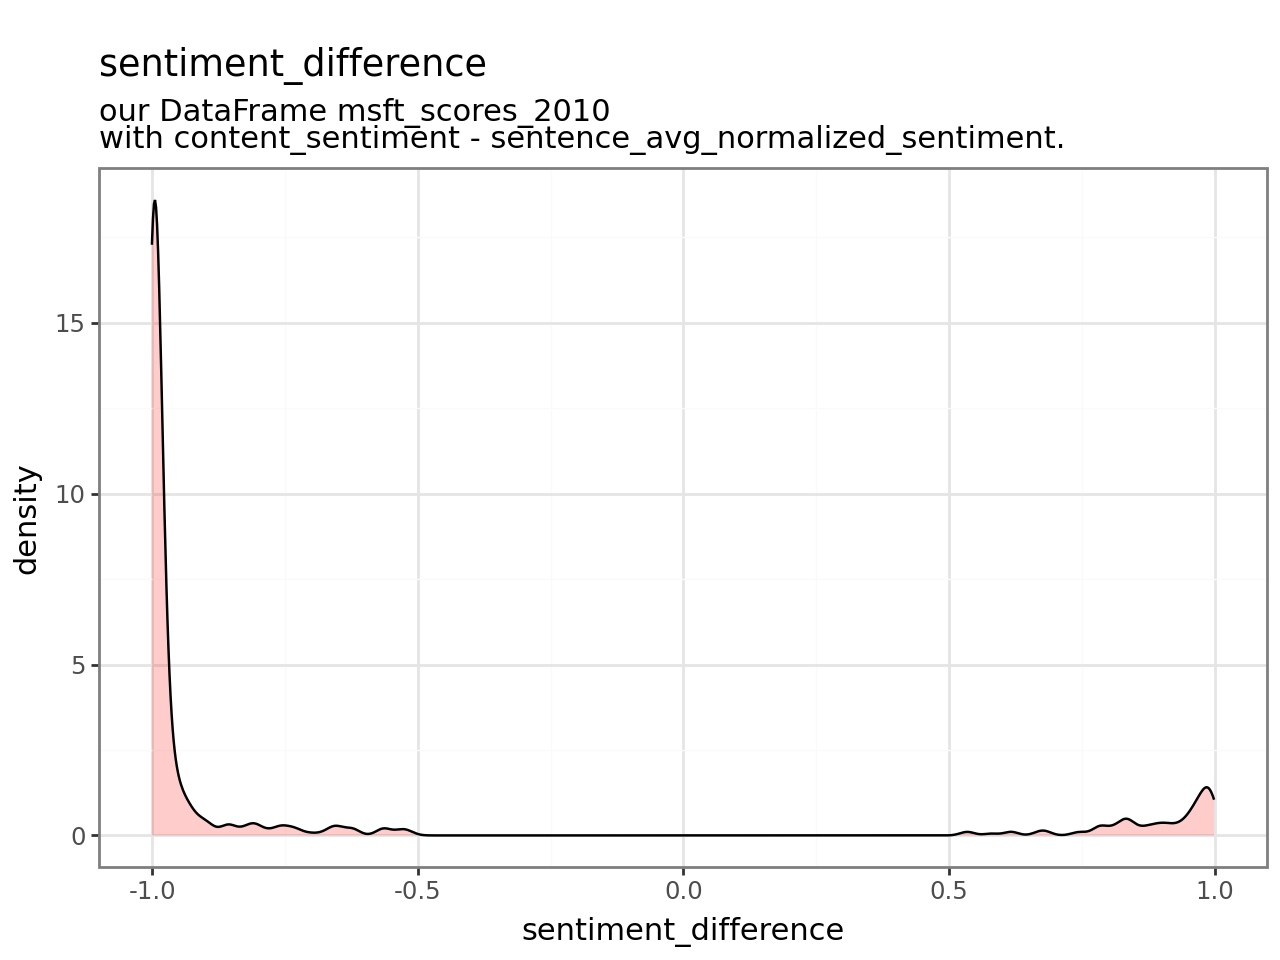

In [338]:
g_sentiment_difference = (
    ggplot(msft_scores_2010,
           aes(x='sentiment_difference'))
    + geom_density(fill = 'red', alpha = 0.20)
    + labs(
          title = "\nsentiment_difference",
          subtitle = "our DataFrame msft_scores_2010 \nwith content_sentiment - sentence_avg_normalized_sentiment."
    )
    + theme_bw()
)

g_sentiment_difference

# Submission
- File > Download > Download .ipynb
- Upload to MS Teams